In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tagenalgo as tg
from tagenalgo import TAGenAlgo
from sklearn.model_selection import train_test_split

### Load training data and split the data into train set and test set
---

In [2]:
df_eth = pd.read_csv('.csv',
                         usecols=["timestamp_val", "high_value", "low_value", "close_value"])
asset_price = np.array(df_eth['close_value'].tolist())
X_train, X_test = train_test_split(asset_price, shuffle=False)
X_train_ret = DataFrame(X_train, columns=['price']).pct_change()['price'].tolist()

### Input hyperparameters for the genetic algorithm
---

In [3]:
model = TAGenAlgo(X_train, 3, 100, 0.9, 0, 'single', 'rsi')
_, init_pop = model.ta_initialize(indicator_set={'rsi': {
    'window': [5, 180],
    'down_thres': [5, 50],
    'up_thres': [51, 90]}})

In [4]:
model.fit(init_pop)
model.predict(X_test)

    |   Individual Performance    |                  Parameters                  |
---- ----------------------------- ---------------------------------------------- ----
 Gen    Expected Return       Win% rsi_window  rsi_down_thres  rsi_up_thres 
   0             1.0689       0.67         21              45            75 
   1             1.4355       0.69       21.0            40.0          75.0 
   2             2.5041       0.71       10.0            31.0          88.0 
The Predicted Strategy Return: 0.45302202179730755
The Predicted Win Rate: 0.6577540106951871


(0.45302202179730755, 0.6577540106951871)

### Comparison between common and modified parameters setting for RSI strategy
---

In [5]:
%matplotlib inline
import talib
import matplotlib.pyplot as plt
from matplotlib import style

In [6]:
# return of underlying asset
asset_cum = tg.strategy_cum_ret(np.array(X_train_ret))

# common parameters set for rsi strategy (window=14, low_threshold=30, high_threshold=70)
rsi = talib.RSI(X_train, timeperiod = 14)
rsi_sig = tg.rsi_signal(X_train, rsi, 30, 70, 0.03)
rsi_ret = tg.strategy_ret(rsi_sig, X_train_ret)
rsi_cum = tg.strategy_cum_ret(rsi_ret)

In [11]:
# modified parameters set for rsi strategy (window=149, low_threshold=49, high_threshold=69)
mod_rsi = talib.RSI(X_train, timeperiod = 10)
mod_rsi_sig = tg.rsi_signal(X_train, mod_rsi, 31, 88, 0.03)
mod_rsi_ret = tg.strategy_ret(mod_rsi_sig, X_train_ret)
mod_rsi_cum = tg.strategy_cum_ret(mod_rsi_ret)

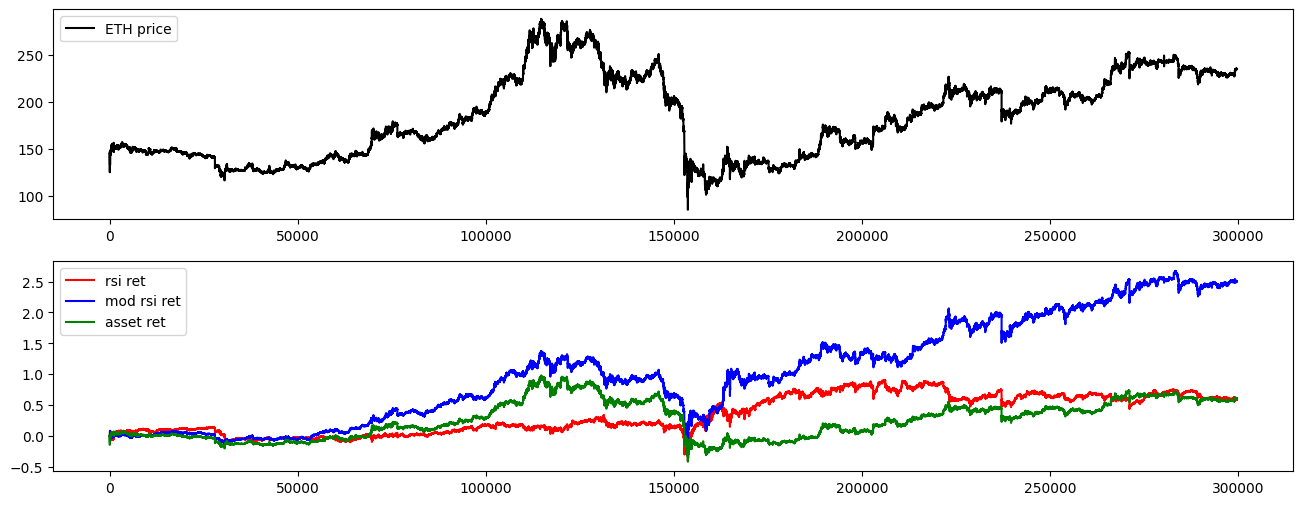

In [12]:
style.use('default')
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(np.array(X_train), color='k', label='ETH price')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(np.array(rsi_cum), label='rsi ret', color='r')
ax2.plot(np.array(mod_rsi_cum), label='mod rsi ret', color='b')
ax2.plot(np.array(asset_cum), label='asset ret', color='g')

ax1.legend(loc='upper left', prop={'size': 10})
ax2.legend(loc='upper left', prop={'size': 10})
plt.show()